In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

***IMPORTING LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


***TRAINING DATASET***

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/train_E6oV3lV.csv/train_E6oV3lV.csv")
print(train.shape)

(31962, 3)


***LOADING DATASET***

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# Check if any value is missing
train.isnull().any()

id       False
label    False
tweet    False
dtype: bool

***Checking out the negative comments from the train set***

In [ ]:
# using head to print first 10 rows
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# checking out the positive comments from the train sets
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


***PREPROCESSING DATASET***

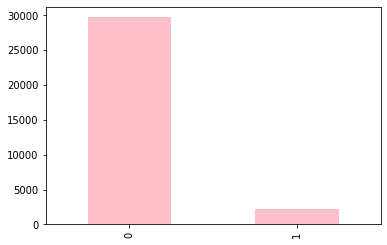

In [ ]:
# showing frequency of negative and positive tweets
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6,4))

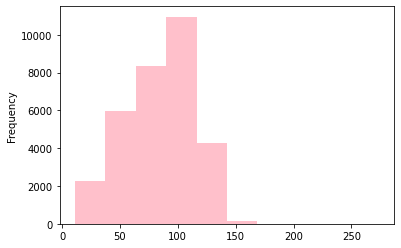

In [ ]:
# checking the distribution of tweets in the data
length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6,4))

In [ ]:
# adding a column to represent the length of the tweet
train['len'] = train['tweet'].str.len()
train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [ ]:
# Group Wise Distribution of DataSet
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

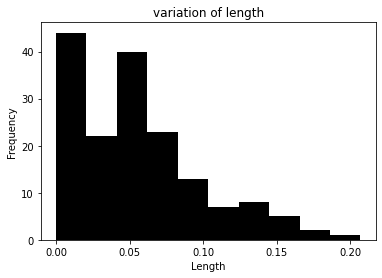

In [ ]:
# Graphical representation of DataSet
train.groupby('len').mean()['label'].plot.hist(color = 'black',figsize = (6,4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most frequently Occuring Words - Top 30')

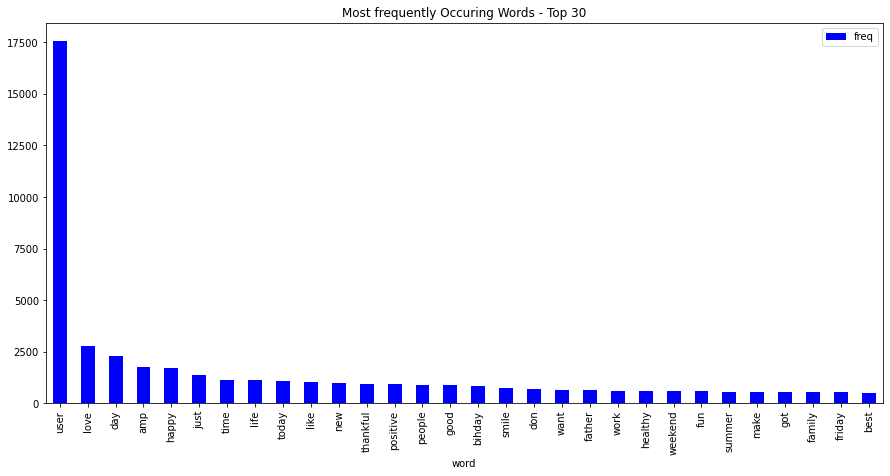

In [ ]:
# Checking most frequently used words and Graphical Representation
from pandas.core.frame import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1],reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word','freq'])
frequency.head(30).plot(x='word', y ='freq', kind= 'bar', figsize=(15,7), color = 'blue')
plt.title("Most frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

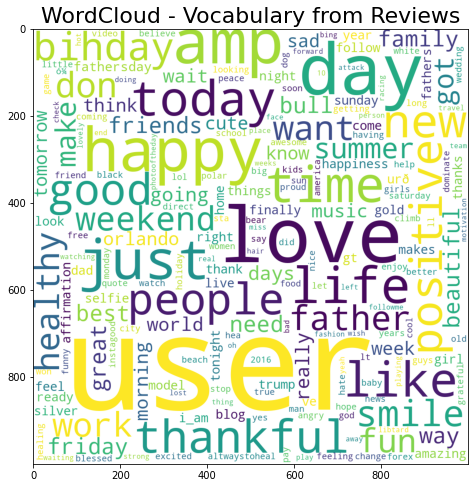

In [ ]:
# Using wordcloud to represent frequency of words 
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize =22)

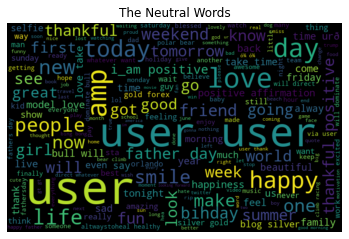

In [ ]:
# Using wordcloud to represent frequency of Neutral words 
normal_words =' '.join([text for text in train['tweet'][train['label']==0]])
wordcloud =WordCloud(width=800, height=500, random_state = 0,max_font_size=110).generate(normal_words)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

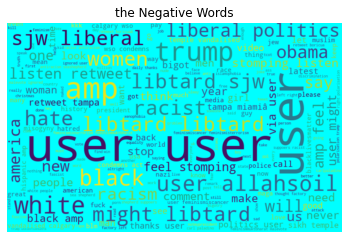

In [ ]:
# Using wordcloud to represent frequency of Negative words 
negative_words = ' '.join([text for text in train['tweet'][train['label']==1]])
wordcloud = WordCloud(background_color='cyan', width=800, height=500, random_state = 0,max_font_size =110).generate(negative_words)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.title('the Negative Words')
plt.show()

In [ ]:
# collecting the hashtags
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
    return hashtags
    

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

#creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5,# context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10,# for negative sampling
            workers = 2, 
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109193, 8411580)

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
  output = []
  for i, s in zip(twt.index, twt):
    output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

    #label all the tweets
    labeled_tweets = add_label(tokenized_tweet)

    labeled_tweets[:6]

In [ ]:
#removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  #stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

  #creating bag of words

  from sklearn.feature_extraction.text import CountVectorizer

  cv = CountVectorizer(max_features = 2500)
  x = cv.fit_transform(train_corpus).toarray()
  y = train.iloc[:, 1]

  print(x.shape)
  print(y.shape)
  

Streaming output truncated to the last 5000 lines.
(29463, 2500)
(31962,)
(29464, 2500)
(31962,)
(29465, 2500)
(31962,)
(29466, 2500)
(31962,)
(29467, 2500)
(31962,)
(29468, 2500)
(31962,)
(29469, 2500)
(31962,)
(29470, 2500)
(31962,)
(29471, 2500)
(31962,)
(29472, 2500)
(31962,)
(29473, 2500)
(31962,)
(29474, 2500)
(31962,)
(29475, 2500)
(31962,)
(29476, 2500)
(31962,)
(29477, 2500)
(31962,)
(29478, 2500)
(31962,)
(29479, 2500)
(31962,)
(29480, 2500)
(31962,)
(29481, 2500)
(31962,)
(29482, 2500)
(31962,)
(29483, 2500)
(31962,)
(29484, 2500)
(31962,)
(29485, 2500)
(31962,)
(29486, 2500)
(31962,)
(29487, 2500)
(31962,)
(29488, 2500)
(31962,)
(29489, 2500)
(31962,)
(29490, 2500)
(31962,)
(29491, 2500)
(31962,)
(29492, 2500)
(31962,)
(29493, 2500)
(31962,)
(29494, 2500)
(31962,)
(29495, 2500)
(31962,)
(29496, 2500)
(31962,)
(29497, 2500)
(31962,)
(29498, 2500)
(31962,)
(29499, 2500)
(31962,)
(29500, 2500)
(31962,)
(29501, 2500)
(31962,)
(29502, 2500)
(31962,)
(29503, 2500)
(31962,)
(29504

In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)



(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

#confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9538230509322988
F1 score : 0.6246185147507629
[[7315  117]
 [ 252  307]]


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

#confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
F1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

#confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.931673132273808
F1 score : 0.5357142857142857
[[7130  302]
 [ 244  315]]


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

#confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9445997246673064
Validation Accuracy : 0.9433112251282693
F1 score : 0.35378031383737524
[[7414   18]
 [ 435  124]]


In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

#confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
F1 score : 0.4986876640419947
[[7419   13]
 [ 369  190]]
